# Étude de l'erreur due à la diffusion et à la convection dans le cas du SWARM

In [1]:
import sys

sys.path = ['/home/as259691/PycharmProjects/FluidDyn1D'] + sys.path

In [2]:
from src.main import *
from src.plot_fields import *

%matplotlib inline
rc('figure', figsize=(10,5))
rc('figure', dpi=100)

## Paramètres de la simulation

Ici on va réaliser une simulation sans diffusion pour différentes écritures de notre équation thermique.

La résolution se fait à chaque fois en WENO avec Euler explicite en temps.

In [3]:
# d = 6./100*Delta/2.
phy_prop = PhysicalProperties(Delta=0.02, v=0.2, dS=0.005**2,
                              lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=1.,
                              alpha=0.06, a_i=357.)
markers = Bulles(phy_prop=phy_prop)
Formulation = [Problem, ProblemConserv2]

n = 1000
t_fin = 0.2

In [4]:
def compare_energy_forme(formu, phy_prop, num_prop, markers, t_fin):
    fig1,ax1 = plt.subplots(1)
    ax1.set_title('Énergie en fonction du temps')
    for form in formu:
        print()
        prob = form(get_T_creneau, markers, phy_prop=phy_prop, num_prop=num_prop)
        E0 = prob.energy
        print(prob.name)
        print('==========================')
        t, e = prob.timestep(t_fin=t_fin, number_of_plots=5, debug=False, plotter=Plotter('decale'))
        l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob.name)
        n = len(e)
        i0 = int(n/5)
        dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
        # par Dt / rho_cp_l T_l V
        print('dE*/dt* = %f' % dedt_adim)
    le = fig1.legend()

## Étude selon la formulation de l'équation

En fait s'il n'y a pas de convection il n'y a pas de différence entre les différentes formes, à l'exception de la moyenne utilisée pour $\frac{1}{\rho C_p}$

### RK4


dt fourier
6.918433404737903e-06
Cas : mixte, rk4, weno, dx = 3.90625e-05, dt = 6.91843e-06, cfl = 0.0354224
dE*/dt* = -0.000006

dt fourier
6.918433404737903e-06
Forme conservative boniou, Cas : mixte, rk4, weno, dx = 3.90625e-05, dt = 6.91843e-06, cfl = 0.0354224
dE*/dt* = 0.000022


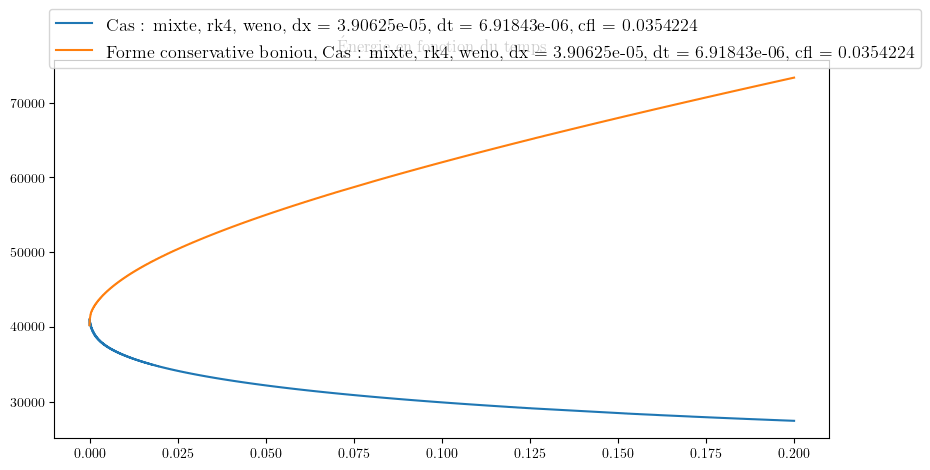

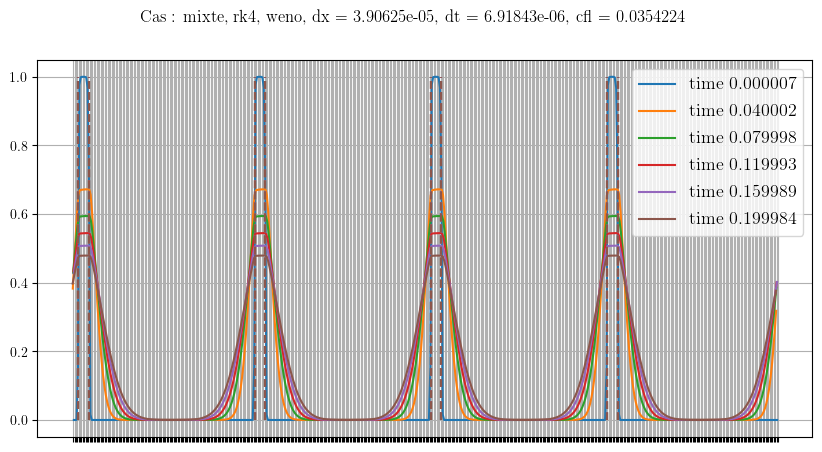

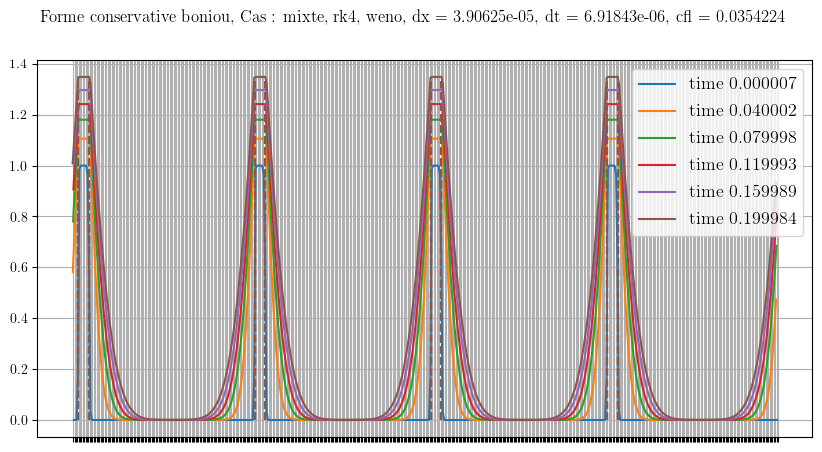

In [5]:
num_prop = NumericalProperties(dx=3.9*10**-5, schema='weno', time_scheme='rk4', phy_prop=phy_prop, cfl=0.5)
compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin)

### Euler

In [6]:
num_prop = NumericalProperties(dx=3.9*10**-5, schema='weno', time_scheme='euler', phy_prop=phy_prop)


dt fourier
6.918433404737903e-06
Cas : mixte, euler, weno, dx = 3.90625e-05, dt = 6.91843e-06, cfl = 0.0354224
dE*/dt* = -0.000005

dt fourier
6.918433404737903e-06
Forme conservative boniou, Cas : mixte, euler, weno, dx = 3.90625e-05, dt = 6.91843e-06, cfl = 0.0354224
dE*/dt* = 0.000023


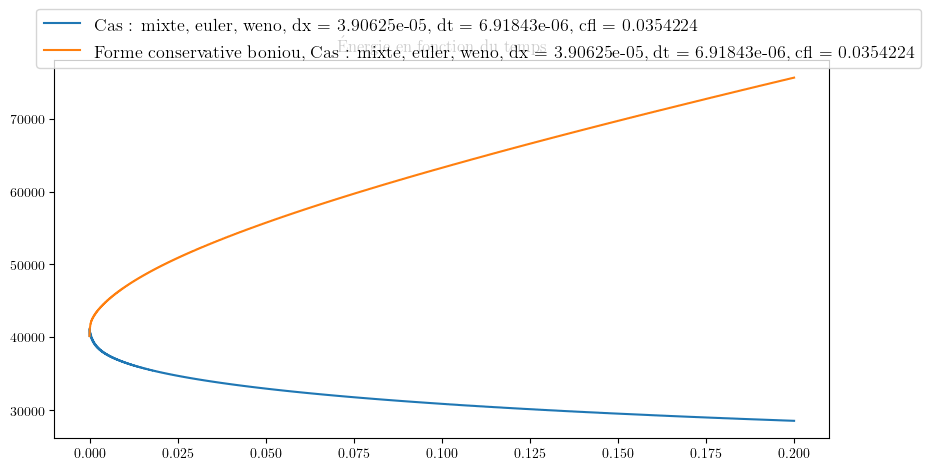

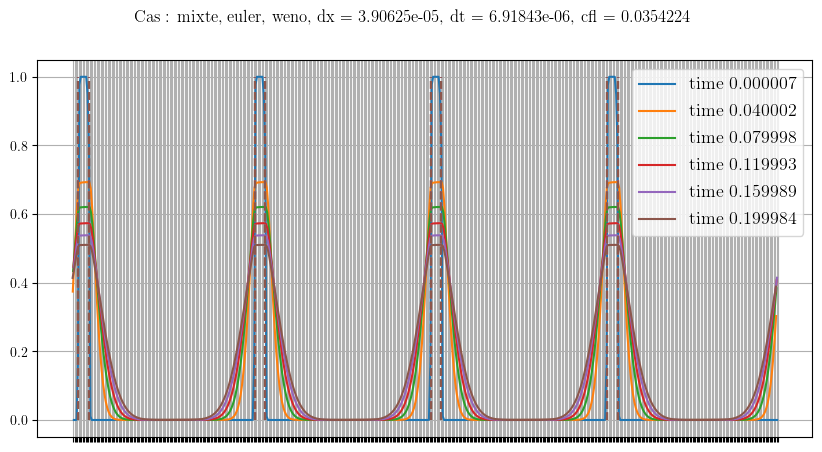

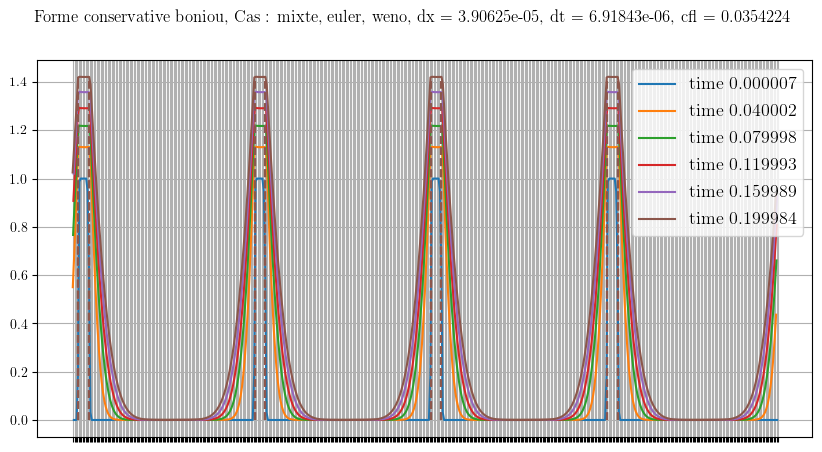

In [7]:
compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin)

## Cas boniou, euler avec weno et upwind quand le stencil traverse l'interface


dt fourier
6.918433404737903e-06
Cas : mixte, euler, weno upwind, dx = 3.90625e-05, dt = 6.91843e-06, cfl = 0.0354224
dE*/dt* = -0.000006

dt fourier
6.918433404737903e-06
Forme conservative boniou, Cas : mixte, euler, weno upwind, dx = 3.90625e-05, dt = 6.91843e-06, cfl = 0.0354224
dE*/dt* = 0.000005


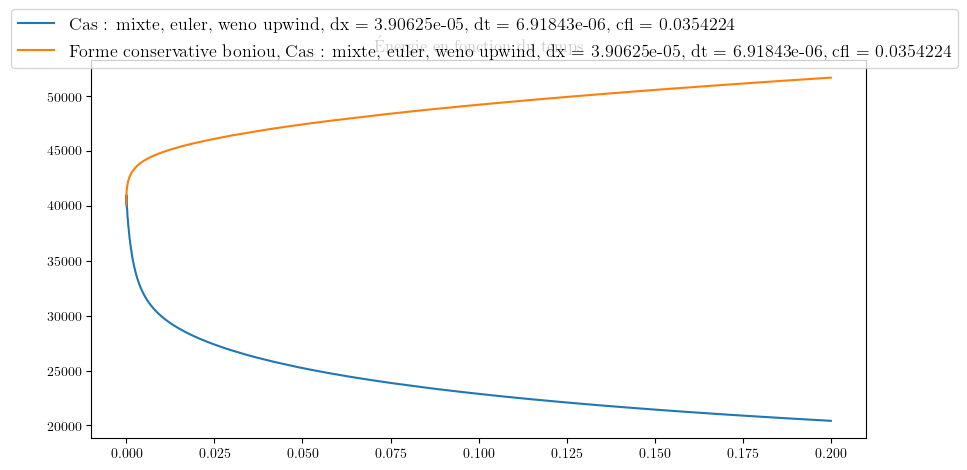

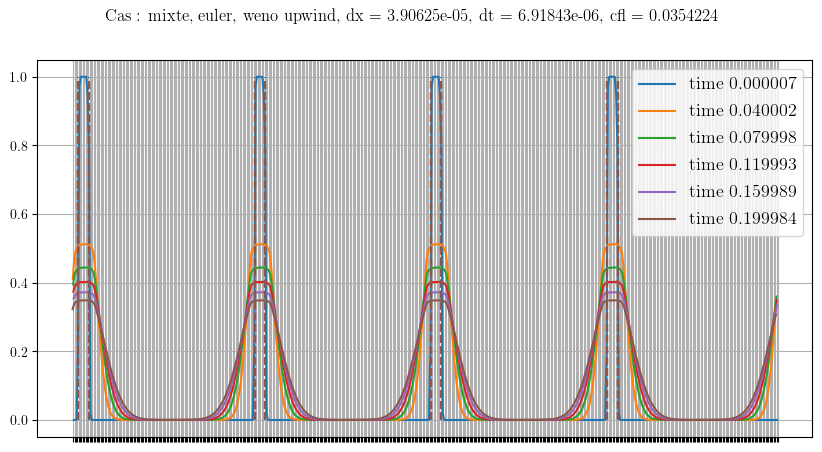

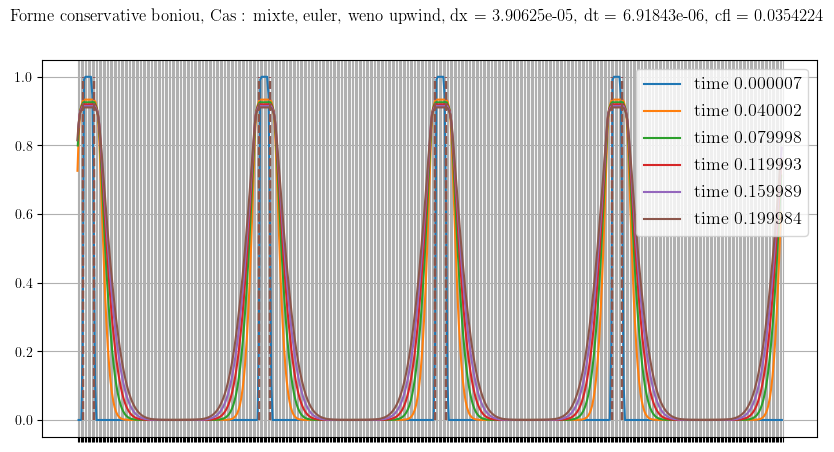

In [8]:
num_prop = NumericalProperties(dx=3.9*10**-5, schema='weno upwind', time_scheme='euler', phy_prop=phy_prop)
compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin)

## Étude numérique

### Étude en $\Delta x$


dt fourier
6.896863867106643e-08
Cas : mixte, euler, weno upwind, dx = 3.90016e-06, dt = 6.89686e-08, cfl = 0.00353671


KeyboardInterrupt: 

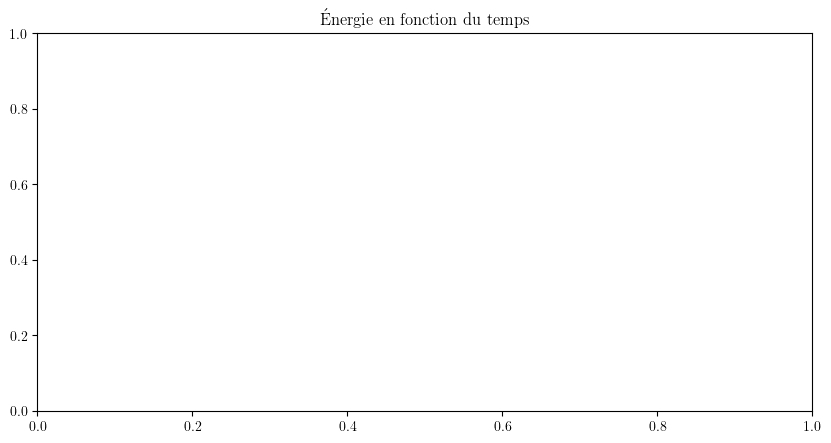

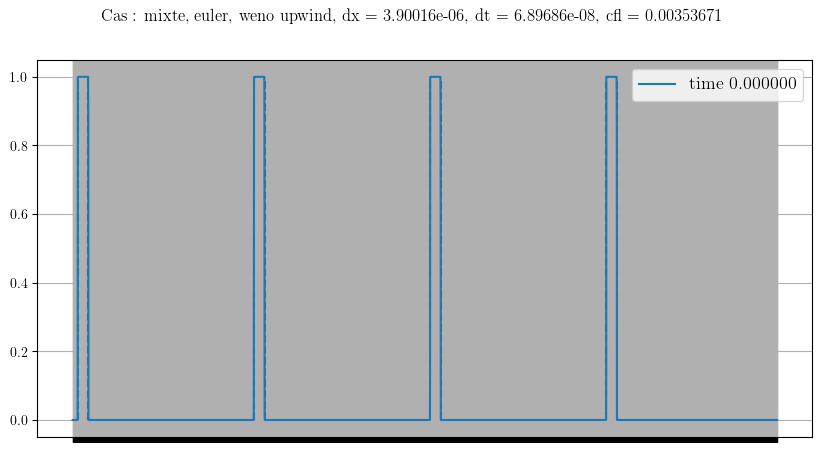

In [9]:
dx_list = [3.9*10**-6, 3.9*10**-5, 1*10**-5]
t_fin = 0.01
for dx in dx_list:
    num_prop = NumericalProperties(dx=dx, schema='weno upwind', time_scheme='euler', phy_prop=phy_prop)
    compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin)